<a href="https://colab.research.google.com/github/hariomshahu/image-processing/blob/main/HandlingGaussianNoise_and_SaltNPepperNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


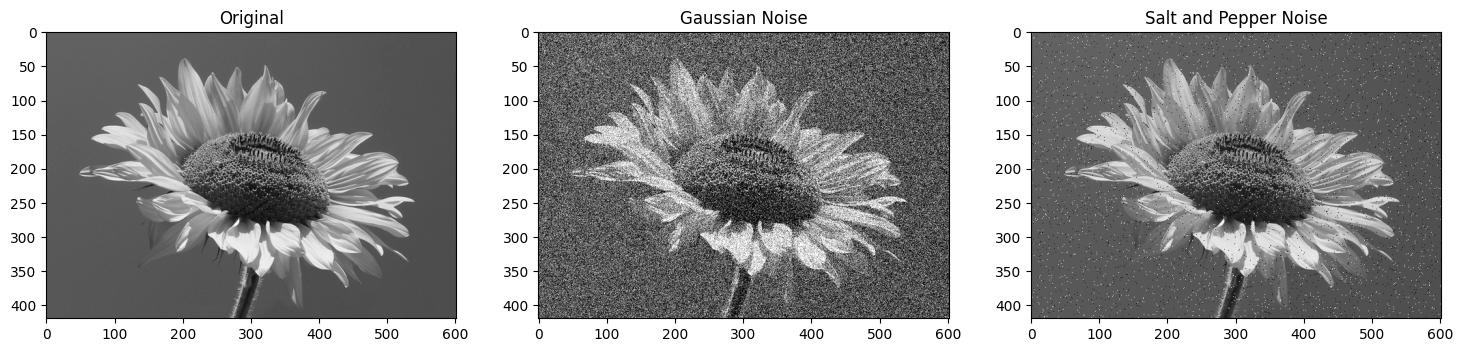

In [144]:
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt
import cv2

# Load an image
image_path = "/content/drive/MyDrive/Colab Notebooks/image_processing_sample_data/sample_1.jpeg"
image = cv2.imread(image_path)
# Convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise using built-in function
stddev = 0.2
noisy_image_gaussian = random_noise(image, mode='gaussian', var=stddev**2)

# Add salt and pepper noise using built-in function
amount = 0.02
noisy_image_salt_pepper = random_noise(image, mode='s&p', amount=amount)

# Display original and noisy images
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Noise')

plt.show()


In [145]:
# Convert noisy images to uint8
# The step of converting the noisy images to uint8 is necessary because OpenCV functions,
# such as cv2.medianBlur, expect images to be of uint8 data type (pixel values ranging from 0 to 255).
# When you add Gaussian noise or salt and pepper noise using the random_noise function from scikit-image,
# the resulting image is in floating-point format with pixel values ranging from 0 to 1.

noisy_image_gaussian = np.uint8(255 * noisy_image_gaussian)
noisy_image_salt_pepper = np.uint8(255 * noisy_image_salt_pepper)

# Apply filters to the noisy image with Gaussian noise
mean_filtered_gaussian_noise = cv2.blur(noisy_image_gaussian, (3, 3))
median_filtered_gaussian_noise = cv2.medianBlur(noisy_image_gaussian, 5)
gaussian_filtered_gaussian_noise = cv2.GaussianBlur(noisy_image_gaussian, (5, 5), 2)
bilateral_filtered_gaussian_noise = cv2.bilateralFilter(noisy_image_gaussian, 90, 60, 180)

# Removing Gaussian Noise
1. ***Most convolution-based smoothing filters act as lowpass frequency filters.*** This means that their effect is to remove high spatial frequency components from an image. The frequency response of a convolution filter, i.e. its effect on different spatial frequencies, can be seen by taking the Fourier transform of the filter.
2. ***Both filters attenuate high frequencies more than low frequencies, but the mean filter exhibits oscillations in its frequency response. The Gaussian on the other hand shows no oscillations. In fact, the shape of the frequency response curve is itself (half a) Gaussian.*** So by choosing an appropriately sized Gaussian filter we can be fairly confident about what range of spatial frequencies are still present in the image after filtering, which is not the case of the mean filter. ***so, we can say that Gaussian filter work well with gaussian noise as compared to mean filter.***
3. ***if the noise is high, then using bilateral filter is more efficent as it can remove the noise and also preserve the edges more effectively as compared to gaussian filter***
4. Parameters of Bilateral Filter:
    * src: Input image.
    * d: Diameter of each pixel neighborhood. Larger d means that farther pixels will influence each other. The recommended value is about half of sigmaSpace.
    * sigmaColor: Filter sigma in the color space. A larger value means that farther colors within the pixel neighborhood (see d) will be mixed together, resulting in larger areas of semi-equal color.
    * sigmaSpace: Filter sigma in the coordinate space. A larger value means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor).
    * dst (optional): Output image of the same size and type as src.
    * borderType (optional): Pixel extrapolation method. Default is cv2.BORDER_DEFAULT.


5. high gaussian noise image:
  * If you have a noisy image and you want to preserve structures while reducing noise effectively, you'll need to carefully choose the parameters for the bilateral filter. Here's a general guideline:

  * sigmaColor: Set a small to moderate value for sigmaColor to preserve edges and structures. A smaller value ensures that only pixels with very similar colors are considered for filtering. This helps in preserving sharp edges and fine details in the image.
  * sigmaSpace: Set a larger value for sigmaSpace to allow pixels that are spatially distant but have similar colors to influence each other. This helps in smoothing out noise while preserving structures and edges. However, you don't want to set it too high, as it might blur out important details.
  * ***Here's an example of parameter values you might start with:
  sigmaColor: 10-30
  sigmaSpace: 50-100***
  * These values are approximate and may need to be adjusted based on the specific characteristics of your image and the level of noise present. It's often a process of trial and error to find the optimal values that provide the desired balance between noise reduction and structure preservation.

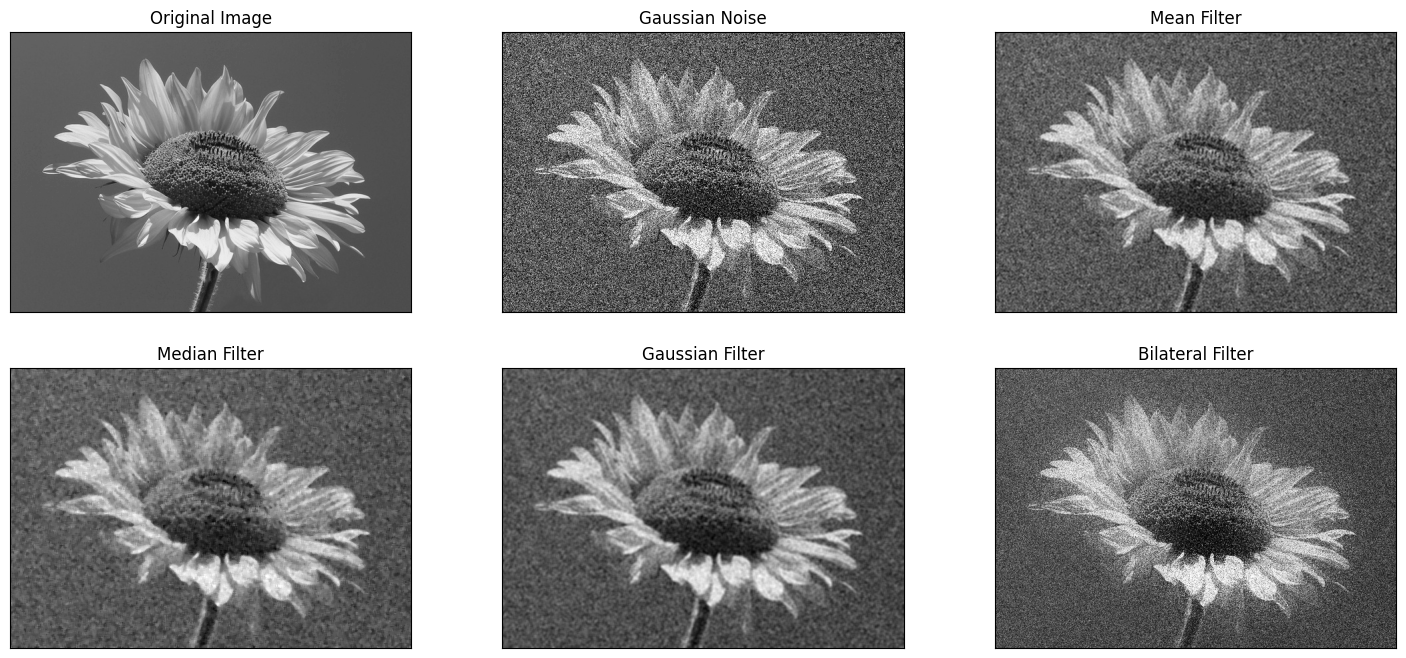

In [146]:
# Plotting the results of different filters on image having gaussian noise
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noise'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(mean_filtered_gaussian_noise, cmap='gray')
plt.title('Mean Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(median_filtered_gaussian_noise, cmap='gray')
plt.title('Median Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(gaussian_filtered_gaussian_noise, cmap='gray')
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(bilateral_filtered_gaussian_noise, cmap='gray')
plt.title('Bilateral Filter'), plt.xticks([]), plt.yticks([])
plt.show()

